### Persistence Images - Persim


In [1]:
from itertools import product

import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

In [8]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
# Printing a PersistenceImager() object will print its defining attributes
pimgr = PersistenceImager(pixel_size=0.2, birth_range=(0,1))
print(pimgr)


PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.2, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [3]:
# PersistenceImager() attributes can be adjusted at or after instantiation.
# Updating attributes of a PersistenceImager() object will automatically update all other dependent attributes.
pimgr.pixel_size = 0.1
pimgr.birth_range = (0, 2)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.0, 2.0), pers_range=(0.0, 1.0), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(20, 10)


In [4]:
# The `fit()` method can be called on one or more (*,2) numpy arrays to automatically determine the miniumum birth and
# persistence ranges needed to capture all persistence pairs. The ranges and resolution are automatically adjusted to
# accomodate the specified pixel size.
pimgr = PersistenceImager(pixel_size=0.5)
pdgms = [np.array([[0.5, 0.8], [0.7, 2.2], [2.5, 4.0]]),
         np.array([[0.1, 0.2], [3.1, 3.3], [1.6, 2.9]]),
         np.array([[0.2, 1.5], [0.4, 0.6], [0.2, 2.6]])]
pimgr.fit(pdgms, skew=True)
print(pimgr)
print(pimgr.resolution)


PersistenceImager(birth_range=(0.1, 3.1), pers_range=(-8.326672684688674e-17, 2.5), pixel_size=0.5, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(6, 5)


In [5]:
# The `transform()` method can then be called on one or more (*,2) numpy arrays to generate persistence images from diagrams.
# The option `skew=True` specifies that the diagrams are currently in birth-death coordinates and must first be transformed
# to birth-persistence coordinates.
pimgs = pimgr.transform(pdgms, skew=True)
pimgs[0]

array([[0.03999068, 0.05688393, 0.06672051, 0.06341749, 0.04820814],
       [0.04506697, 0.06556791, 0.07809764, 0.07495246, 0.05730671],
       [0.04454486, 0.06674611, 0.08104366, 0.07869919, 0.06058808],
       [0.04113063, 0.0636504 , 0.07884635, 0.07747833, 0.06005714],
       [0.03625436, 0.05757744, 0.07242608, 0.07180125, 0.05593626],
       [0.02922239, 0.04712024, 0.05979033, 0.05956698, 0.04653357]])

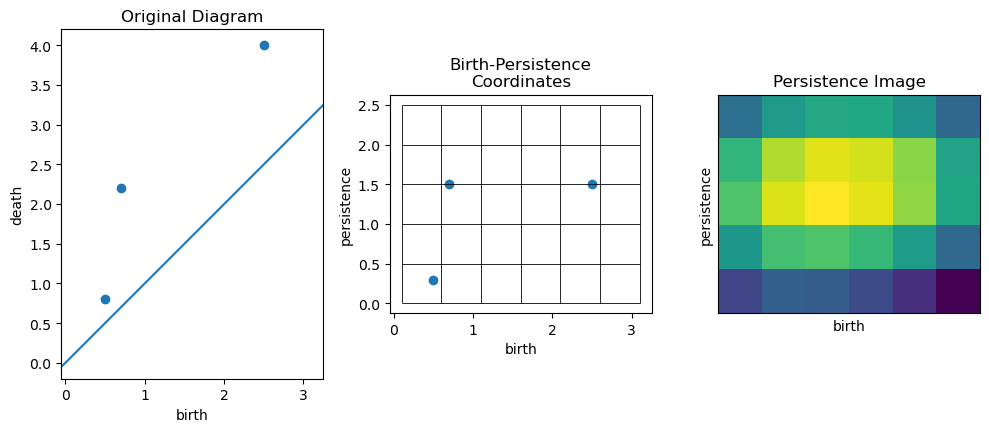

In [11]:
# The `plot_diagram()` and `plot_image()` methods can be used to visualize persistence diagrams and images
fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(pdgms[0], skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(pdgms[0], skew=True, ax=axs[1])

axs[2].set_title("Persistence Image")
pimgr.plot_image(pimgs[0], ax=axs[2])

plt.tight_layout()
plt.show()

### Generate a persistence diagram using Ripser

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


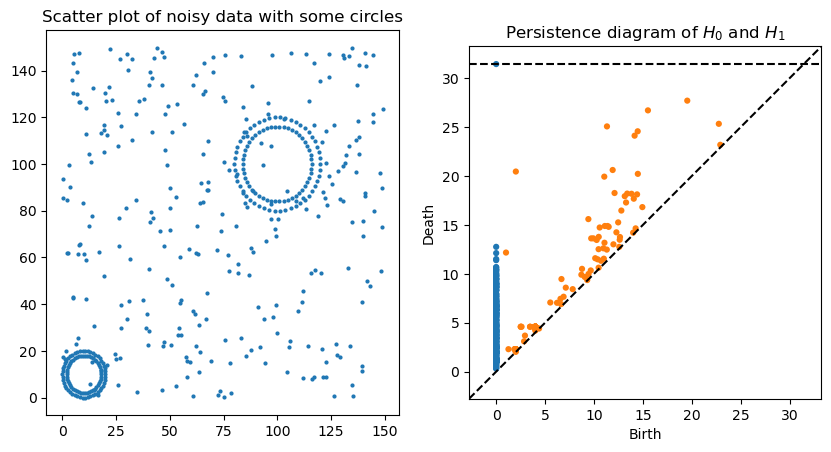

In [13]:
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)),
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

### Modify the Persistence Pair Kernel
Reduce the standard deviate of the isotropic Gaussian kernel used.



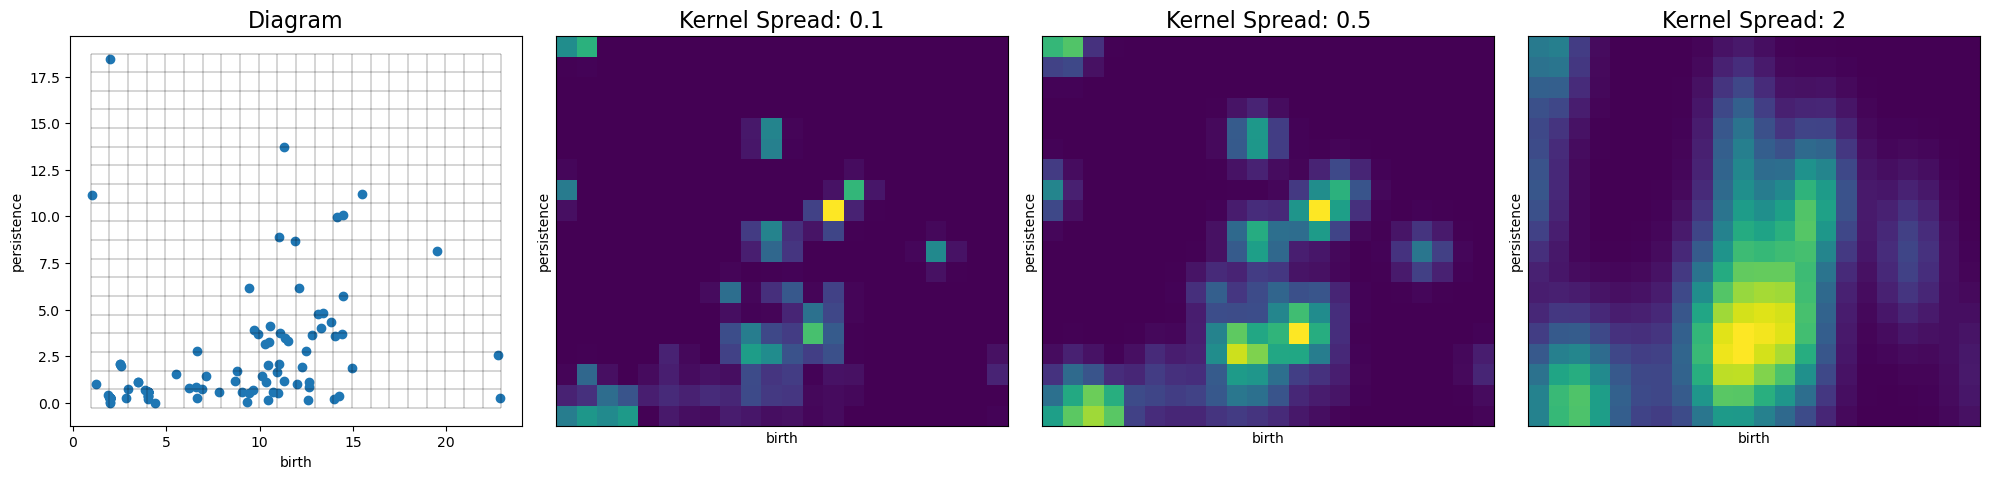

In [20]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified
# either by a float or a 2x2 covariance matrix
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 4, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.1}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)

pimgr.kernel_params = {'sigma': .5}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Kernel Spread: 0.5', fontsize=16)

# Non-isotropic, standard bivariate Gaussian with greater spread along the persistence axis
pimgr.kernel_params = {'sigma': np.array([[1, 0],[0, 6]])}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[3])
axs[3].set_title('Kernel Spread: 2', fontsize=16)

plt.tight_layout()
plt.show()